In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

In [3]:
# loading and reading the data path and saving as a variable
file_path = '/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/DLS_Plots/20240122_DLS_DIP_Serum.xlsx'
sheet_name = "Sheet1"  

# reading and saving data from specific excel sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [4]:
# retrieving info from dataframe that I'll plot
print(df)
polymer = df['Polymer']
diameter = df['Effective Diameter Avg.']
stdev = df['Stddev']

color_gray = "#818689"

  Polymer  Effective Diameter Avg.      Stddev
0      S1              1812.550000  154.078884
1      B1               488.866667   37.217357
2      G1               353.533333    7.511387
3      G2               376.910000    5.603285
4      G3               369.950000   19.818423


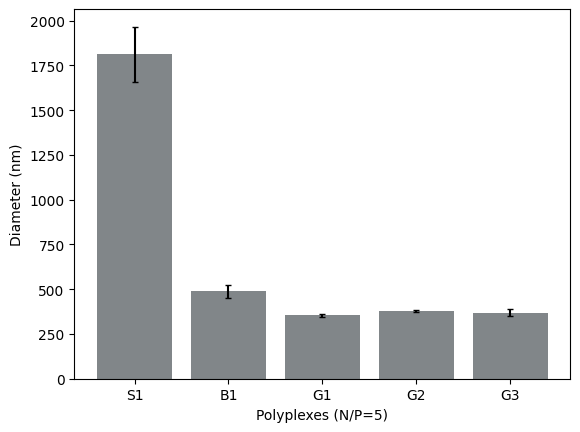

In [5]:
# use this plot for similarly sized polyplexes
plt.bar(polymer, diameter, yerr=stdev, capsize = 2, color=color_gray)
plt.xticks(df['Polymer'])
plt.xlabel('Polyplexes (N/P=5)')
plt.ylabel('Diameter (nm)')
plt.show()

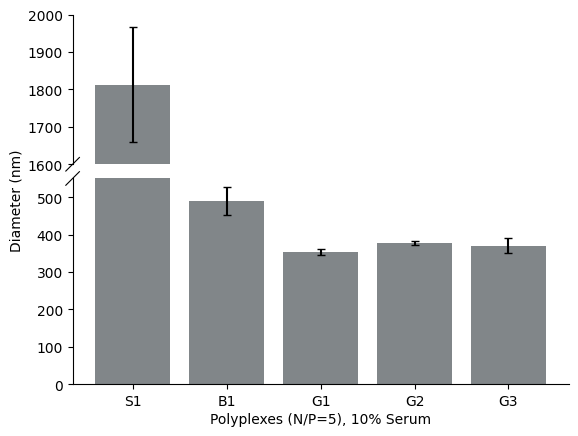

In [8]:
# use this plot for largely disperse polyplexes
bax = brokenaxes(ylims=((0, 550), (1600, 2000)),  hspace=0.08)
bax.bar(polymer, diameter, yerr=stdev, capsize=3, color=color_gray)
bax.set_xticks(polymer)
bax.set_xlabel('Polyplexes (N/P=5), 10% Serum', labelpad=20)
bax.set_ylabel('Diameter (nm)', labelpad=35)

plt.show()